In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

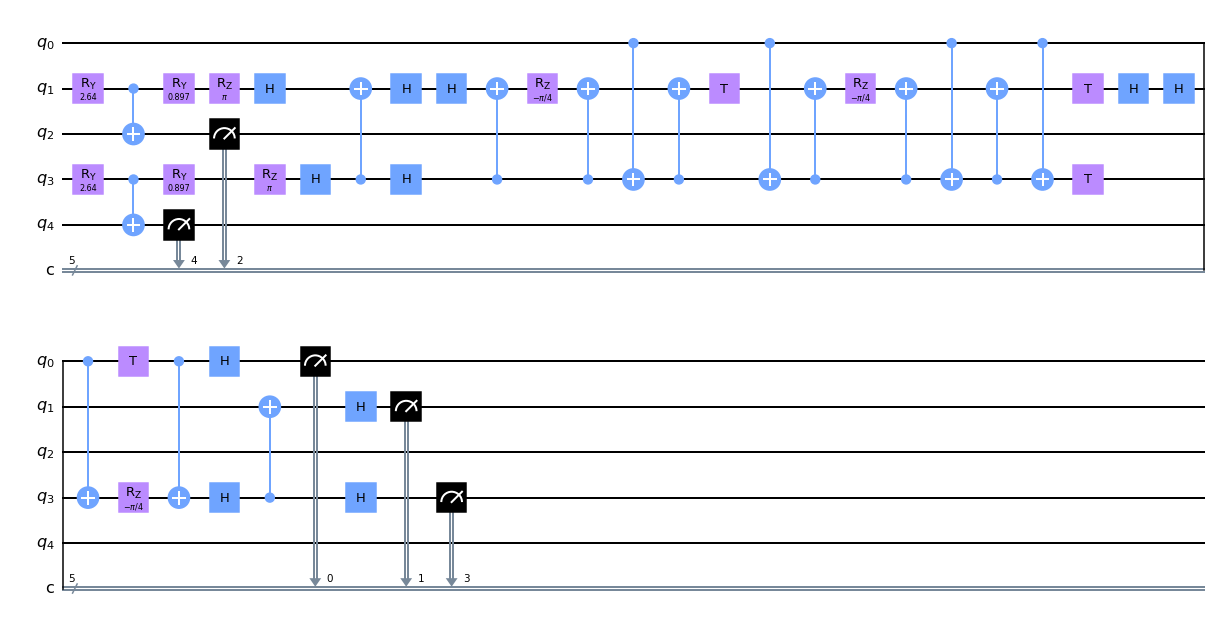

In [7]:
import math
def add_U3(qc, qubit_num1, qubit_num2, theta1, theta2):
    qc.ry(theta1,qubit_num1)
    qc.cnot(qubit_num1, qubit_num2)
    qc.ry(theta2,qubit_num1)
    qc.rz(math.pi,qubit_num1)
    return qc

def PCA_circuit(theta1, theta2):
    
    qc = QuantumCircuit(5,5)
    add_U3(qc,1,2,theta1,theta2)
    add_U3(qc,3,4,theta1,theta2)
    
    qc.h(1)
    qc.h(3)
    qc.cnot(3,1)
    qc.h(1)
    qc.h(3)
    qc.h(1)
    qc.cnot(3,1)
    qc.rz(-math.pi/4, 1)
    qc.cnot(3,1)
    qc.cnot(0,3)
    qc.cnot(3,1)
    qc.t(1)
    qc.cnot(0,3)
    qc.cnot(3,1)
    qc.rz(-math.pi/4, 1)
    qc.cnot(3,1)
    qc.cnot(0,3)
    qc.cnot(3,1)
    qc.cnot(0,3)
    qc.t(1)
    qc.h(1)
    qc.t(3)
    qc.h(1)
    qc.cnot(0,3)
    qc.rz(-math.pi/4, 3)
    qc.t(0)
    qc.cnot(0,3)
    qc.h(3)
    qc.h(0)
    qc.cnot(3,1)
    qc.h(1)
    qc.h(3)
    qc.measure(0,0)
    qc.measure(1,1)
    qc.measure(2,2)
    qc.measure(3,3)
    qc.measure(4,4)
    return qc


def PCA_circuit2(theta1, theta2):
    qc = QuantumCircuit(5,5)
    add_U3(qc,1,2,theta1,theta2)
    add_U3(qc,3,4,theta1,theta2)
    qc.h(0)
    qc.cswap(0,1,3)
    qc.h(0)
    return qc
    
qc = PCA_circuit(2.635840, 0.896898)
#qc = PCA_circuit(0.505753, -2.244695)
qc.draw()

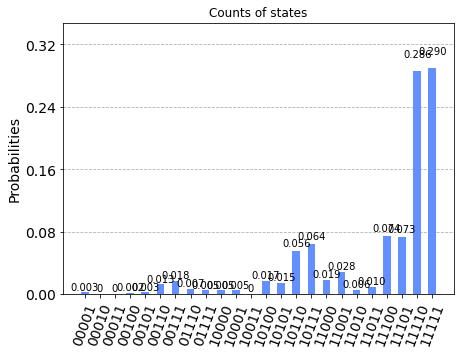

In [9]:
# Simulation
simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Counts of states')

In [10]:
# Get probability
print(counts)
total = 0
for k in counts.keys():
    total = total + counts[k]
print(total)
p0 = 0
p1 = 1
for k,v in counts.items():
    if k[0] == '0':
        p0 = p0 + v
    else:
        p1 = p1 + v
p0 = p0 / total
p1 = p1 / total
print(p0, p1)



{'00010': 1, '10011': 1, '00101': 3, '10001': 5, '01110': 7, '11010': 6, '01111': 5, '11110': 293, '11100': 76, '10110': 57, '11111': 297, '10100': 17, '11101': 75, '11001': 29, '00110': 13, '10111': 66, '11000': 19, '00001': 3, '00100': 2, '00011': 1, '00111': 18, '11011': 10, '10000': 5, '10101': 15}
1024
0.0517578125 0.94921875


In [11]:
Tr = 1.677882
P = p0 - p1
print(P)
e1 = Tr * (1 + math.sqrt(1 - 2 * (1 - P))) / 2
e2 = Tr * (1 - math.sqrt(1 - 2 * (1 - P))) / 2
print(e1, e2)

-0.8974609375
Traceback (most recent call last):
  File "<ipython-input-11-1f2147f37839>", line 4, in <module>
    e1 = Tr * (1 + math.sqrt(1 - 2 * (1 - P))) / 2
ValueError: math domain error

Use %tb to get the full traceback.
